<a href="https://colab.research.google.com/github/soyebganja/DL-Practice-Projects/blob/main/8%3AModel%20Optimization%3A%20Training%20Algorithms/8_6_Optimizers_in_Action_with_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
from torch import nn, optim
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt


In [3]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

100%|██████████| 26.4M/26.4M [00:01<00:00, 15.5MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 308kB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 5.48MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 12.5MB/s]


In [4]:
type(training_data)

torchvision.datasets.mnist.FashionMNIST

In [5]:
batch_size = 64

train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

In [6]:
for images, labels in train_dataloader:
    print(images.shape)
    print(labels.shape)
    break

torch.Size([64, 1, 28, 28])
torch.Size([64])


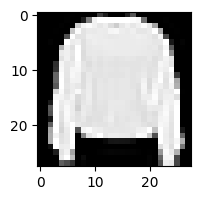

In [11]:
plt.figure(figsize=(2, 2))
plt.imshow(images[7].squeeze(), cmap="gray")
plt.show()

In [13]:
labels[7]

tensor(2)

In [26]:
device = ("cuda" if torch.cuda.is_available()
else "mps" if torch.backends.mps.is_available()
else "cpu")
print(f"Using {device} device")

Using cpu device


In [27]:
class ClothsClasifier(nn.Module):
  def __init__(self):
    super().__init__()
    self.network = nn.Sequential(
        nn.Flatten(),
        nn.Linear(28*28, 128),
        nn.ReLU(),
        nn.Linear(128, 64),
        nn.ReLU(),
        nn.Linear(64, 10)
    )


  def forward(self, x):
    return self.network(x)


In [28]:
model = ClothsClasifier().to(device)
# optimiser = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
optimiser = optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()

In [29]:
epochs = 2

for epoch in range(epochs):
  for batch, (images, labels) in enumerate(train_dataloader):
    images = images.to(device)
    labels = labels.to(device)

    # 1. Forward pass
    optimiser.zero_grad()
    predictions = model(images)
    loss = loss_fn(predictions, labels)

    # 2. Backward pass
    loss.backward()

    # 3. Update wieght
    optimiser.step()

    if batch % 100 == 0:
      print(f"Epoch: {epoch} | Batch: {batch} | Loss: {loss.item()}")

# SGD without momemtum (2.31 ==> 2.06)
# SGD with momumtum(2.30 ==> 0.65)
# Adam (2.30 ==> 0.48)

Epoch: 0 | Batch: 0 | Loss: 2.302257776260376
Epoch: 0 | Batch: 100 | Loss: 0.8133978247642517
Epoch: 0 | Batch: 200 | Loss: 0.45040082931518555
Epoch: 0 | Batch: 300 | Loss: 0.6168220639228821
Epoch: 0 | Batch: 400 | Loss: 0.5167648196220398
Epoch: 0 | Batch: 500 | Loss: 0.4622653126716614
Epoch: 0 | Batch: 600 | Loss: 0.42125260829925537
Epoch: 0 | Batch: 700 | Loss: 0.6220594644546509
Epoch: 0 | Batch: 800 | Loss: 0.5496124625205994
Epoch: 0 | Batch: 900 | Loss: 0.5034422278404236
Epoch: 1 | Batch: 0 | Loss: 0.3198843002319336
Epoch: 1 | Batch: 100 | Loss: 0.41299158334732056
Epoch: 1 | Batch: 200 | Loss: 0.3227578103542328
Epoch: 1 | Batch: 300 | Loss: 0.4545401930809021
Epoch: 1 | Batch: 400 | Loss: 0.422526478767395
Epoch: 1 | Batch: 500 | Loss: 0.3721804916858673
Epoch: 1 | Batch: 600 | Loss: 0.35186341404914856
Epoch: 1 | Batch: 700 | Loss: 0.5758815407752991
Epoch: 1 | Batch: 800 | Loss: 0.4910585582256317
Epoch: 1 | Batch: 900 | Loss: 0.480493426322937


In [31]:
model.eval()

all_predicted = []
all_labels = []

with torch.no_grad():
    for images, labels in test_dataloader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)

        _, predicted = torch.max(outputs.data, 1)

        all_predicted.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

In [33]:
all_labels[:5]

[np.int64(9), np.int64(2), np.int64(1), np.int64(1), np.int64(6)]

In [34]:
all_predicted[:5]

[np.int64(9), np.int64(2), np.int64(1), np.int64(1), np.int64(6)]

In [36]:
from sklearn.metrics import classification_report

report = classification_report(all_labels, all_predicted)
print(report)


              precision    recall  f1-score   support

           0       0.83      0.79      0.81      1000
           1       0.97      0.97      0.97      1000
           2       0.83      0.60      0.70      1000
           3       0.82      0.88      0.85      1000
           4       0.65      0.88      0.75      1000
           5       0.97      0.92      0.94      1000
           6       0.70      0.60      0.65      1000
           7       0.89      0.96      0.92      1000
           8       0.93      0.98      0.95      1000
           9       0.96      0.93      0.95      1000

    accuracy                           0.85     10000
   macro avg       0.86      0.85      0.85     10000
weighted avg       0.86      0.85      0.85     10000

